In [1]:
import numpy as np
import pandas as pd
import random
import scipy.stats as sps
import matplotlib.pyplot as plt

random.seed(45)  

Creating ID Feature with 800 samples, and then randomly shuffling the data points

In [2]:
n=800
id_feature=list("ID"+str(i+100) for i in range(1,n+1))
random.shuffle(id_feature)

Creating Groups A, B and C and then shuffling them

In [3]:
groups = np.repeat(['A', 'B', 'C'], repeats=[267, 267, 266])
random.shuffle(groups)

Creating Feature_1 which is sampled randomly from a normal distribution with mean 2500 and std = 300.

In [4]:
mean = 2500
std = 300
var_1 = sps.norm.rvs(mean, std, size=n)
var_1.mean()

2502.095998360235

Creating Feature_2 which is sampled randomly from a normal distribution with mean 400 and standard
deviation 15.

In [5]:
mean_2 = 400
std_2 = 15
var_2 = sps.norm.rvs(mean_2, std_2, size=n)
var_2.mean()

400.5698355316061

Creating a DataFrame with the ID, Group, Feature_1, Feature_2 Columns

In [6]:
data = pd.DataFrame({"ID":id_feature,"Group":groups,"Feature_1":var_1,"Feature_2":var_2})
data['Group'].value_counts()

B    267
A    267
C    266
Name: Group, dtype: int64

Creating Feature_3 using Group Feature_1 and Feature_2 based on the given rules.

In [7]:
data['Feature_3'] = np.nan


data.loc[data['Group'] == 'A', 'Feature_3'] = 3 * data['Feature_1'] - 5 * data['Feature_2']
data.loc[data['Group'] == 'B', 'Feature_3'] = 2 * data['Feature_1']
data.loc[data['Group'] == 'C', 'Feature_3'] = -data['Feature_1'] + data['Feature_2']



Adding Additional Component which is sampled from a normal distribution wiht mean 0 and standard seviation 12. 

In [8]:
mean_3 = 0
std_3 = 12
additional_component = sps.norm.rvs(mean, std, size=n)
data['Feature_3'] += additional_component


In [9]:
data.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID763,C,2692.871213,399.363886,269.108298
1,ID204,C,2506.518867,387.363921,253.167046
2,ID734,C,2973.597370,384.953236,202.789146
3,ID422,B,2139.574925,410.314184,6417.260637
4,ID559,C,2296.441540,394.323199,-336.588153


Samples greater than 3000 based on theoretical distribution

In [10]:
from scipy.stats import norm

mean_4 = 2500
std_dev = 300

# Z-score for 3000
z = (3000 - mean_4) / std_dev

above_3000 = 1 - norm.cdf(z)

# Estimate the number of samples greater than 3000
samples_above_3000 = round( n * above_3000)

print("Number of samples greater than 3000:", samples_above_3000)


Number of samples greater than 3000: 38.0


Samples which are greater than 3000

In [11]:
sum(data['Feature_1']>3000)

40

Mean and standard deviation of Feature_3 within each group

In [12]:
groupdata = data.groupby('Group')['Feature_3'].agg(['mean', 'std'])

print(groupdata)

              mean         std
Group                         
A      7979.803519  951.910315
B      7522.023411  709.651185
C       405.902148  457.061082


Scatterplot of Feature_3 vs Feature_1

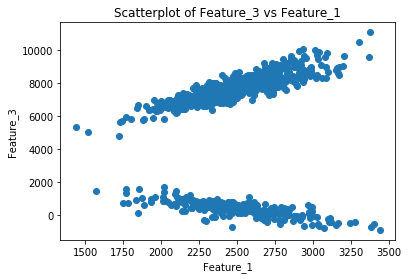

In [13]:
plt.scatter(data['Feature_1'], data['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.show()

Dumping the data frame into data.csv file.

In [16]:
data.to_csv('data.csv', index=False)